# **Clustering and PCA with a Spotify Songs dataset**

Variables information: [Spotify Audio Features](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features) 

### Libreries Import

In [10]:
# Author: Santiago Arevalo Valencia

# Data manipulation
import pandas as pd
import numpy as np

# Visualisation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Plotting
import matplotlib.pyplot as plt

# Dimensionality reduction
from sklearn.decomposition import PCA

# Hierarchical clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Loading Data

In [11]:
dataset = pd.read_csv('data.csv')
dataset.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


### EDA (Dropping, duplicated values, null values)

In [12]:
# Drop unnamed column
dataset.drop(dataset.columns[0], axis=1, inplace=True)

# Review duplicates and drop them
dataset.duplicated().sum()
dataset.drop_duplicates(inplace=True)

# Review missing values
dataset.isnull().sum()

dataset

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


## **Clustering**

#### *Dropping columns unnecessary for clustering*

In [13]:
# Apply Clustering to the dataset to find similarities between songs

# Make a copy of song_title column before dropping it
song_titles = dataset['song_title']

# Drop columns that are not needed for clustering
dataset.drop(['song_title', 'artist', 'target'], axis=1, inplace=True)
dataset.head()


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904


#### *Data Standardization*

In [14]:
# Standardize the data
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)
dataset_scaled

array([[-0.68295641,  1.33291337, -0.50805217, ...,  1.0666493 ,
         0.12420466, -0.85501052],
       [ 0.04424262,  0.77377857,  0.98379412, ...,  1.44222993,
         0.12420466,  0.36713964],
       [-0.58974552,  1.36397641, -0.73845158, ..., -1.74497703,
         0.12420466, -1.31230511],
       ...,
       [-0.68923466,  0.11524204, -0.47634526, ...,  1.06739889,
         0.12420466, -0.11038923],
       [-0.71592687, -0.38176666, -0.73975644, ...,  1.06473786,
         0.12420466,  0.50877956],
       [-0.7114204 , -1.07136624, -0.50902776, ...,  2.56398706,
         0.12420466, -0.38557536]])

#### *Finding the optimal number of clusters*

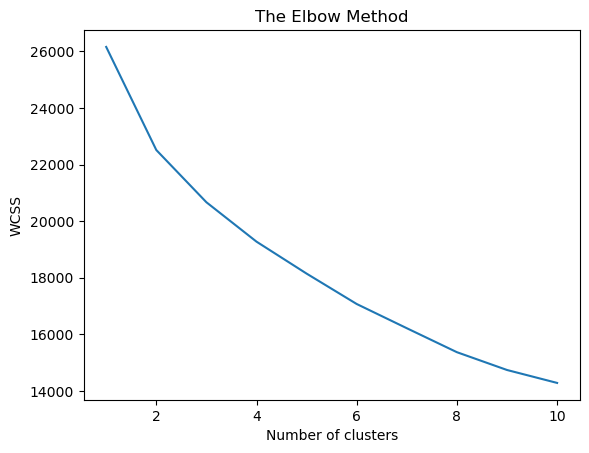

In [15]:
# Find the optimal number of clusters

# Create an empty list
wcss = []

# Create 10 clusters using a for loop
for i in range(1, 11):
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=i, random_state=0)
    # Fit model to samples
    kmeans.fit(dataset_scaled)
    # Append the inertia to the list of inertias
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### *Applying K-Means Clustering*

In [16]:
# Create a KMeans instance with 4 clusters: model
model = KMeans(n_clusters=4, random_state=0)

# Fit model to points
model.fit(dataset_scaled)

# Determine the cluster labels of new_points: labels
labels = model.predict(dataset_scaled)

# Print cluster labels of new_points
print(labels)


[3 3 3 ... 3 3 2]


#### *Labels and species as columns*

In [17]:
# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'song_title': song_titles})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['song_title'])

# Display ct
print(ct)

song_title  $ave Dat Money (feat. Fetty Wap & Rich Homie Quan)  \
labels                                                           
0                                                           0    
1                                                           0    
2                                                           0    
3                                                           1    

song_title  'Till I Collapse  (Bonus) Break Her Down  \
labels                                                 
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          1                       1   

song_title  (Everything I Do) I Do It For You  (You Drive Me) Crazy  \
labels                                                                
0                                           0                     1   
1                                           0        

#### *Cluster Centers*

[[-0.19977054  0.32562499  0.04575363  0.15378087 -0.09625623  0.24984508
  -0.30304209  0.14969022 -1.2567765   0.06928688  0.00455963  0.13732965
   0.24701879]
 [ 2.22798965 -0.97481619  0.5938882  -2.0562103   0.90734137 -0.14504932
  -0.24709081 -1.99056077  0.15639469 -0.57078393 -0.28471025 -0.98532305
  -1.08689088]
 [-0.49908071 -0.76533979 -0.10583437  0.76112557  0.17311724  0.21596971
   1.49825864  0.55242018  0.01379578  0.23220661  0.49500937 -0.00362726
  -0.35221771]
 [-0.13493042  0.26926354 -0.11174231  0.03234819 -0.18590023 -0.21679245
  -0.30945127  0.09977034  0.79568642 -0.01647401 -0.1302162   0.11116006
   0.18961025]]


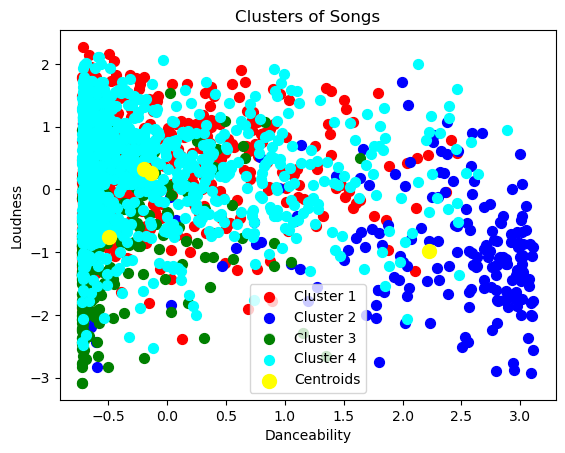

In [18]:
# Show the cluster centers
print(model.cluster_centers_)

# Plot the clusters
plt.scatter(dataset_scaled[labels == 0, 0], dataset_scaled[labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(dataset_scaled[labels == 1, 0], dataset_scaled[labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(dataset_scaled[labels == 2, 0], dataset_scaled[labels == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(dataset_scaled[labels == 3, 0], dataset_scaled[labels == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Clusters of Songs')
plt.xlabel('Danceability')
plt.ylabel('Loudness')
plt.legend()
plt.show()

## **PCA (Features)**

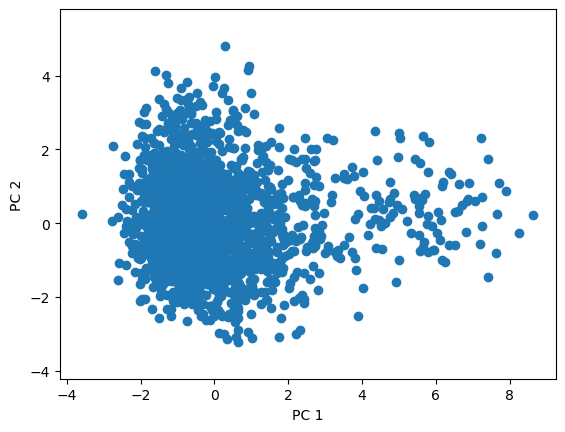

In [19]:
# Apply Principal Component Analysis (PCA)

# Create a PCA instance with 2 components: model
model = PCA(n_components=2)

# Apply the fit_transform method of model to dataset_scaled: pca_features
pca_features = model.fit_transform(dataset_scaled)

# Assign 0th column of pca_features: xs
xs = pca_features[:, 0]

# Assign 1st column of pca_features: ys
ys = pca_features[:, 1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
# Label the axes
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Show the plot
plt.show()

## **Clustering with PCA**

#### *Applying K-Means Clustering*

In [20]:
# Create a KMeans instance with 4 clusters: model
model = KMeans(n_clusters=4, random_state=0)

# Fit model to points
model.fit(pca_features)

# Determine the cluster labels of new_points: labels
labels = model.predict(pca_features)

# Print cluster labels of new_points
print(labels)

[2 1 2 ... 0 0 0]


#### *Labels and species as columns*

In [21]:
# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'song_title': song_titles})

# Create crosstab: ct

ct = pd.crosstab(df['labels'], df['song_title'])
print(ct)

song_title  $ave Dat Money (feat. Fetty Wap & Rich Homie Quan)  \
labels                                                           
0                                                           0    
1                                                           0    
2                                                           1    
3                                                           0    

song_title  'Till I Collapse  (Bonus) Break Her Down  \
labels                                                 
0                          1                       0   
1                          0                       0   
2                          0                       1   
3                          0                       0   

song_title  (Everything I Do) I Do It For You  (You Drive Me) Crazy  \
labels                                                                
0                                           0                     0   
1                                           1        

#### *Cluster Centers*

[[-0.7877411   1.3530858 ]
 [ 1.16134634 -0.21026993]
 [-0.80096756 -0.84002711]
 [ 5.34980508  0.37434564]]


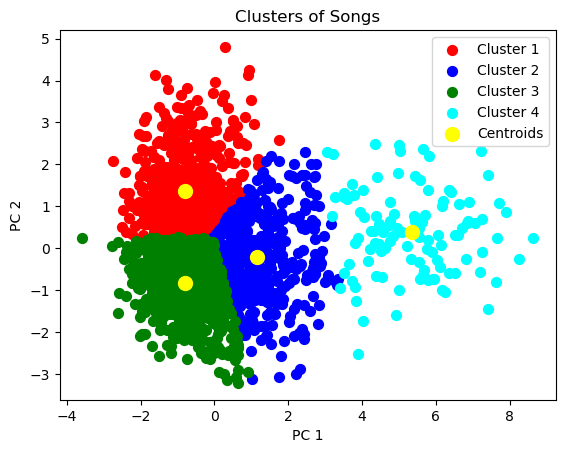

In [22]:
# Show the cluster centers
print(model.cluster_centers_)
# Plot the clusters
plt.scatter(pca_features[labels == 0, 0], pca_features[labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(pca_features[labels == 1, 0], pca_features[labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(pca_features[labels == 2, 0], pca_features[labels == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(pca_features[labels == 3, 0], pca_features[labels == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Clusters of Songs')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

## **Hierarchical Clustering with PCA**

song_title  $ave Dat Money (feat. Fetty Wap & Rich Homie Quan)  \
labels                                                           
0                                                           0    
1                                                           1    
2                                                           0    
3                                                           0    

song_title  'Till I Collapse  (Bonus) Break Her Down  \
labels                                                 
0                          0                       0   
1                          0                       1   
2                          1                       0   
3                          0                       0   

song_title  (Everything I Do) I Do It For You  (You Drive Me) Crazy  \
labels                                                                
0                                           1                     0   
1                                           0        

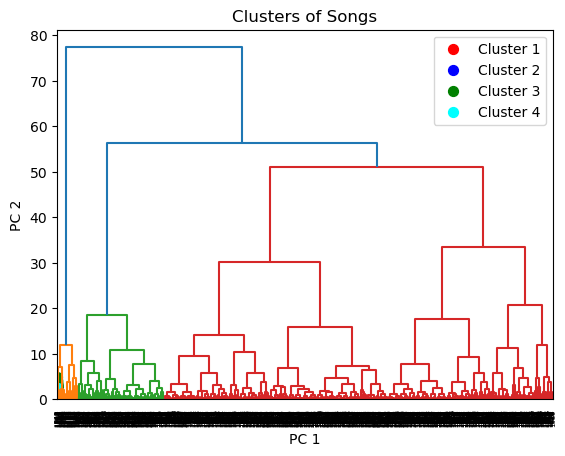

In [23]:
# Do Hierarchical Clustering with PCA

# Create a dendrogram
dendrogram = sch.dendrogram(sch.linkage(pca_features, method='ward'))

# Create a Hierarchical Clustering model with 4 clusters
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

# Fit and predict the clusters
y_hc = hc.fit_predict(pca_features)
y_hc

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': y_hc, 'song_title': song_titles})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['song_title'])

# Display ct
print(ct)

# Plot the clusters
plt.scatter(pca_features[y_hc == 0, 0], pca_features[y_hc == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(pca_features[y_hc == 1, 0], pca_features[y_hc == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(pca_features[y_hc == 2, 0], pca_features[y_hc == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(pca_features[y_hc == 3, 0], pca_features[y_hc == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.title('Clusters of Songs')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()